In [115]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [116]:
df=pd.read_csv('/content/1ToyotaCorolla.csv')

**EDA**

In [117]:
df.head()

,model,price,age_08_04,mfg_month,mfg_year,km,fuel_type,hp,met_color,color,...,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,parking_assistant,tow_bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,0,0,0,1,0,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,0,1,0,0,0,1,0,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,1,0,0,0,1,0,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,1,0,0,0,1,0,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,0,1,0,1,0,0,0,0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   model              1436 non-null   object
 1   price              1436 non-null   int64 
 2   age_08_04          1436 non-null   int64 
 3   mfg_month          1436 non-null   int64 
 4   mfg_year           1436 non-null   int64 
 5   km                 1436 non-null   int64 
 6   fuel_type          1436 non-null   object
 7   hp                 1436 non-null   int64 
 8   met_color          1436 non-null   int64 
 9   color              1436 non-null   object
 10  automatic          1436 non-null   int64 
 11  cc                 1436 non-null   int64 
 12  doors              1436 non-null   int64 
 13  cylinders          1436 non-null   int64 
 14  gears              1436 non-null   int64 
 15  quarterly_tax      1436 non-null   int64 
 16  weight             1436 non-null   int64 


In [119]:
df.describe()

,price,age_08_04,mfg_month,mfg_year,km,hp,met_color,automatic,cc,doors,...,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,parking_assistant,tow_bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,4.033426,...,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.002786,0.277855
std,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,0.952677,...,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.052723,0.448098
min,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,3.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,4.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,5.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We'llConsider only the below columns and prepare a prediction model for predicting Price.

("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")



In [120]:
df.columns

Index(['model', 'price', 'age_08_04', 'mfg_month', 'mfg_year', 'km',
       'fuel_type', 'hp', 'met_color', 'color', 'automatic', 'cc', 'doors',
       'cylinders', 'gears', 'quarterly_tax', 'weight', 'mfr_guarantee',
       'bovag_guarantee', 'guarantee_period', 'abs', 'airbag_1', 'airbag_2',
       'airco', 'automatic_airco', 'boardcomputer', 'cd_player',
       'central_lock', 'powered_windows', 'power_steering', 'radio',
       'mistlamps', 'sport_model', 'backseat_divider', 'metallic_rim',
       'radio_cassette', 'parking_assistant', 'tow_bar'],
      dtype='object')

In [121]:
df=df.iloc[:,[1,2,5,7,11,12,14,15,16]]

In [122]:
df

,price,age_08_04,km,hp,cc,doors,gears,quarterly_tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


<Axes: >

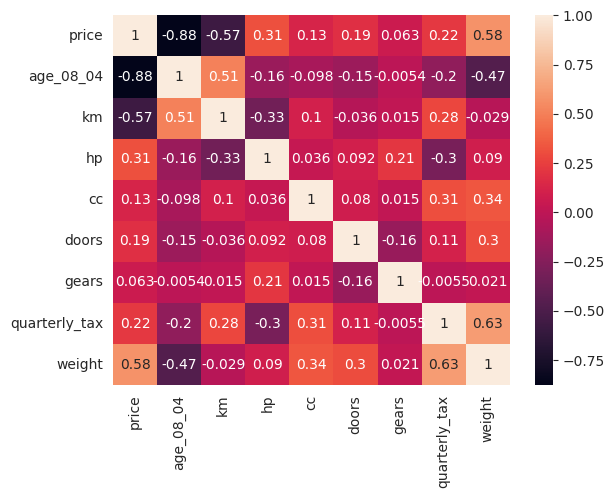

In [123]:
import seaborn as sns

sns.heatmap(df.corr(),annot=True)

In [124]:
df.corr()


,price,age_08_04,km,hp,cc,doors,gears,quarterly_tax,weight
price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
km,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
hp,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
quarterly_tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


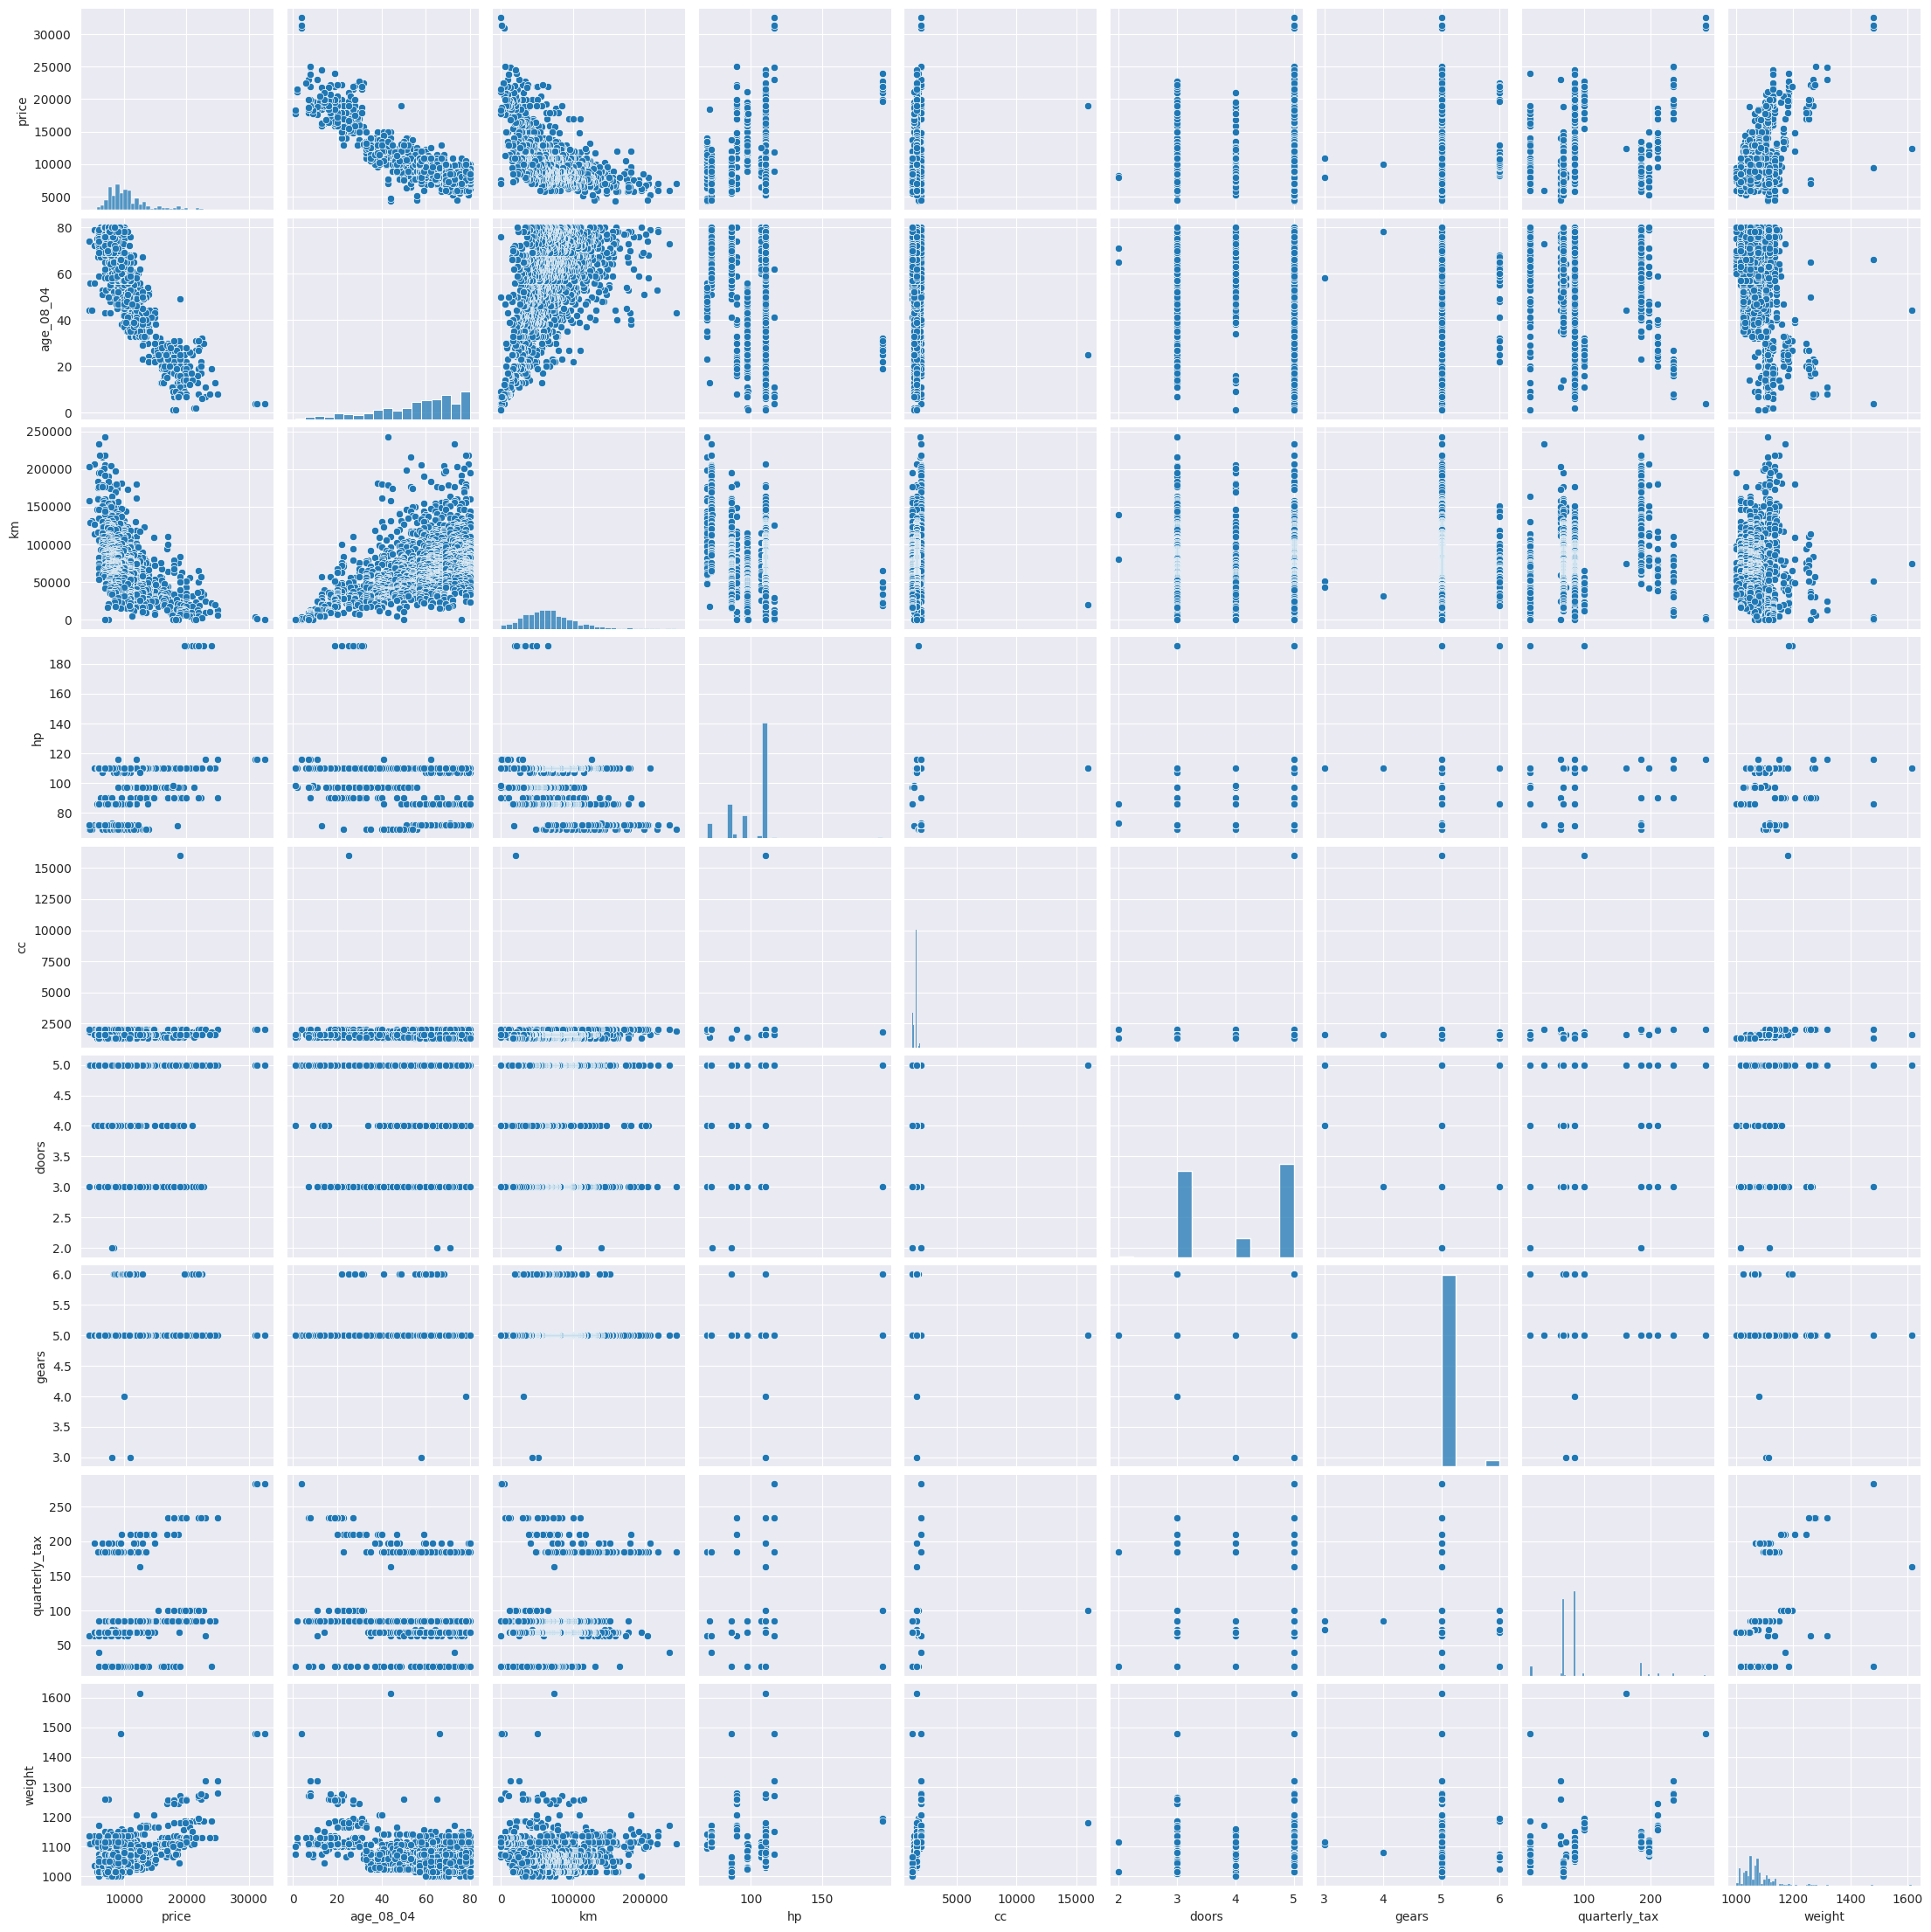

In [125]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [126]:
x=df.iloc[:,1:]
y=df['price']

**Preparing a Model**

In [127]:
import statsmodels.formula.api as smf
model=smf.ols('price~age_08_04+km+hp+cc+doors+gears+quarterly_tax+weight',data=df).fit()
model

In [128]:
model.pvalues

Intercept         8.241949e-05
age_08_04        3.354724e-288
km                7.538439e-57
hp                3.757218e-28
cc                1.790902e-01
doors             9.677716e-01
gears             2.606549e-03
quarterly_tax     2.619148e-03
weight            2.048576e-52
dtype: float64

In [129]:
model.params

Intercept       -5573.106358
age_08_04        -121.658402
km                 -0.020817
hp                 31.680906
cc                 -0.121100
doors              -1.616641
gears             594.319936
quarterly_tax       3.949081
weight             16.958632
dtype: float64

In [130]:
model.rsquared,model.rsquared_adj

(0.8637627463428191, 0.8629989775766962)

In [131]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sun, 20 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:07:49   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
km               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
hp               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
gears           594.3199    197.055      3.016      0.003     207.771     980.869
quarterly_tax     3.9491      1.310      3.015      0.003       1.379       6.519
weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Variance Inflation Factor (VIF)**

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [133]:
vif = pd.DataFrame()

In [134]:
vif['vif_value'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [135]:
vif

,vif_value
0,16.392684
1,7.590522
2,64.894960
3,17.199750
4,21.874692
5,438.631804
6,11.020074
7,543.133076


In [136]:
vif['col'] = x.columns

In [137]:
vif

,vif_value,col
0,16.392684,age_08_04
1,7.590522,km
2,64.894960,hp
3,17.199750,cc
4,21.874692,doors
5,438.631804,gears
6,11.020074,quarterly_tax
7,543.133076,weight


In [138]:
inf = model.get_influence()

In [139]:
c , p = inf.cooks_distance

<StemContainer object of 3 artists>

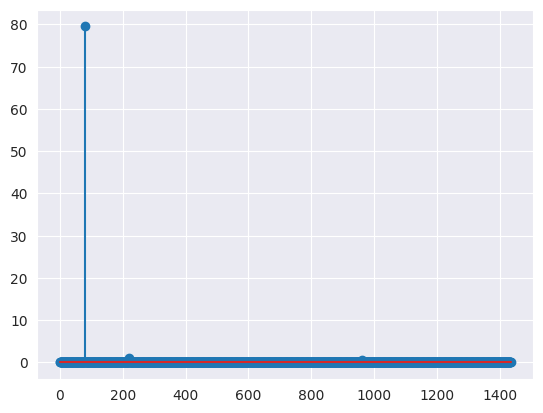

In [140]:
import matplotlib.pyplot as plt
plt.stem(c)

In [141]:
np.argmax(c),np.max(c)

(80, 79.52010624141815)

**Residual Analysis**

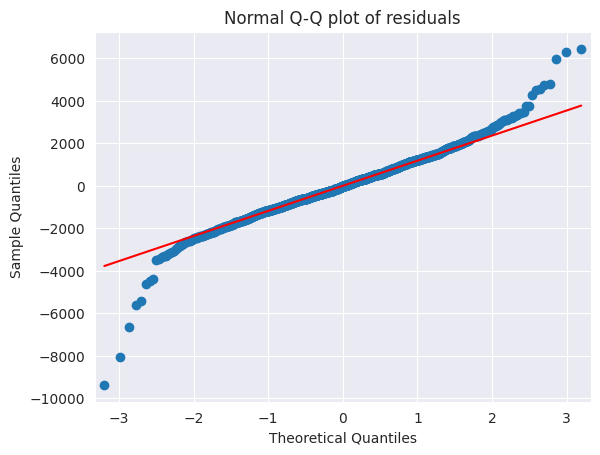

In [142]:
# Test for Normality of Residuals (Q-Q Plot) using residual model

import statsmodels.api as sm


sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [143]:
list(np.where(model.resid<-6000))

[array([221, 601, 960])]

In [144]:
df[df.index.isin([201,601,960])]

,price,age_08_04,km,hp,cc,doors,gears,quarterly_tax,weight
201,11250,40,96518,97,1400,3,5,69,1025
601,7500,50,1,90,2000,3,5,64,1260
960,9390,66,50806,86,1300,3,5,19,1480


**Residual Plot for Homoscedasticity**

In [145]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()

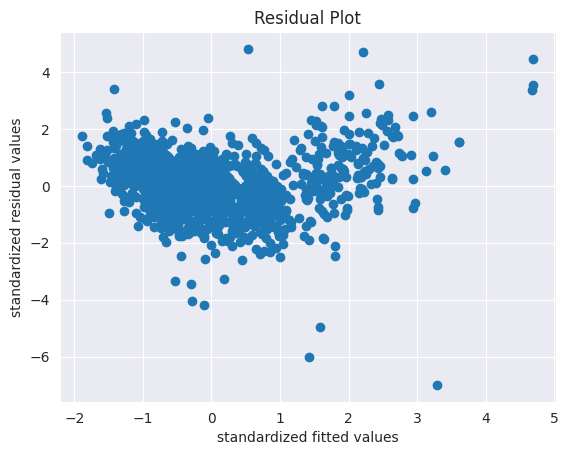

In [146]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

**Residual vs Regressors**

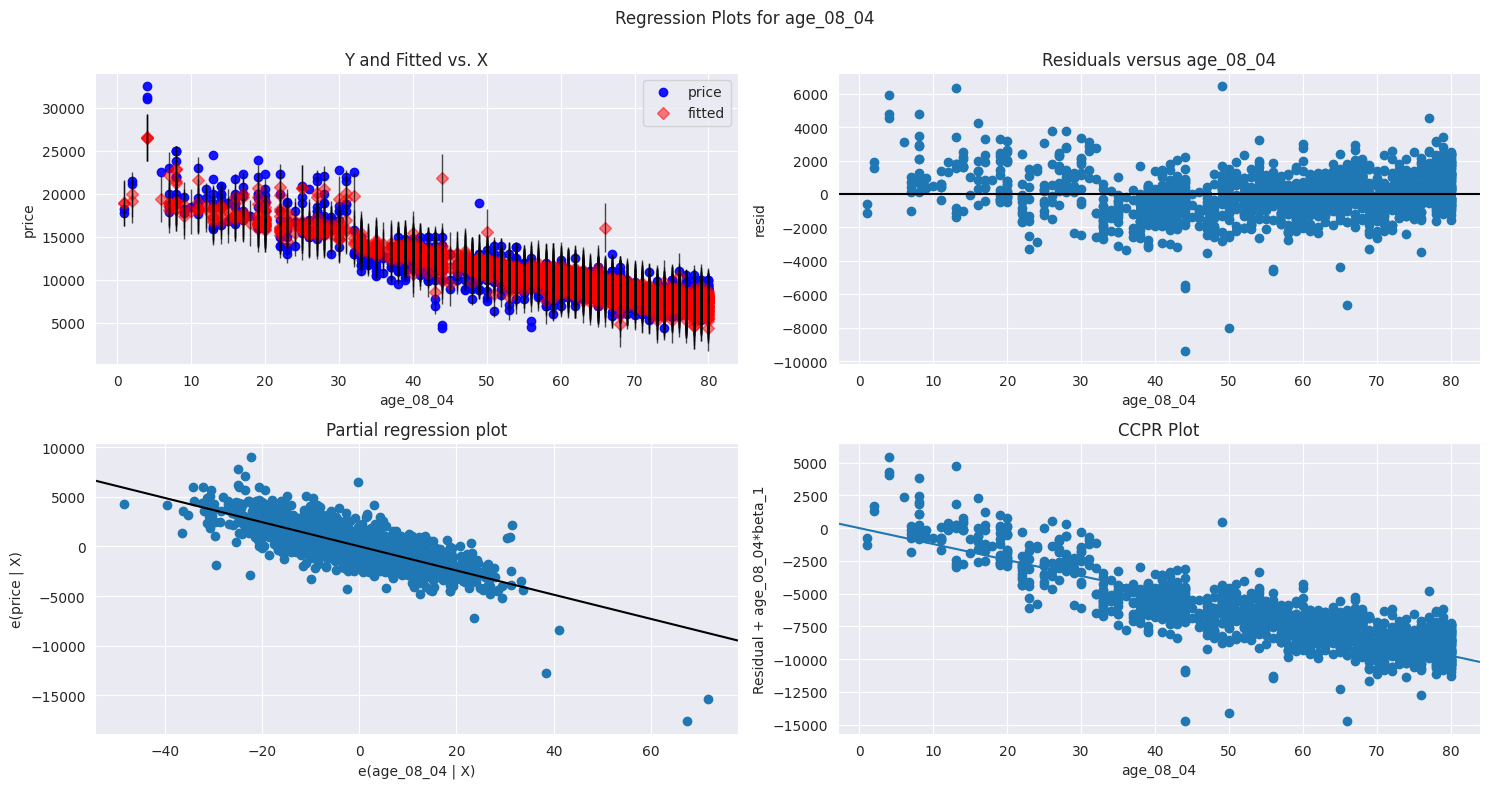

In [147]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables.
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'age_08_04',fig=fig)
plt.show()

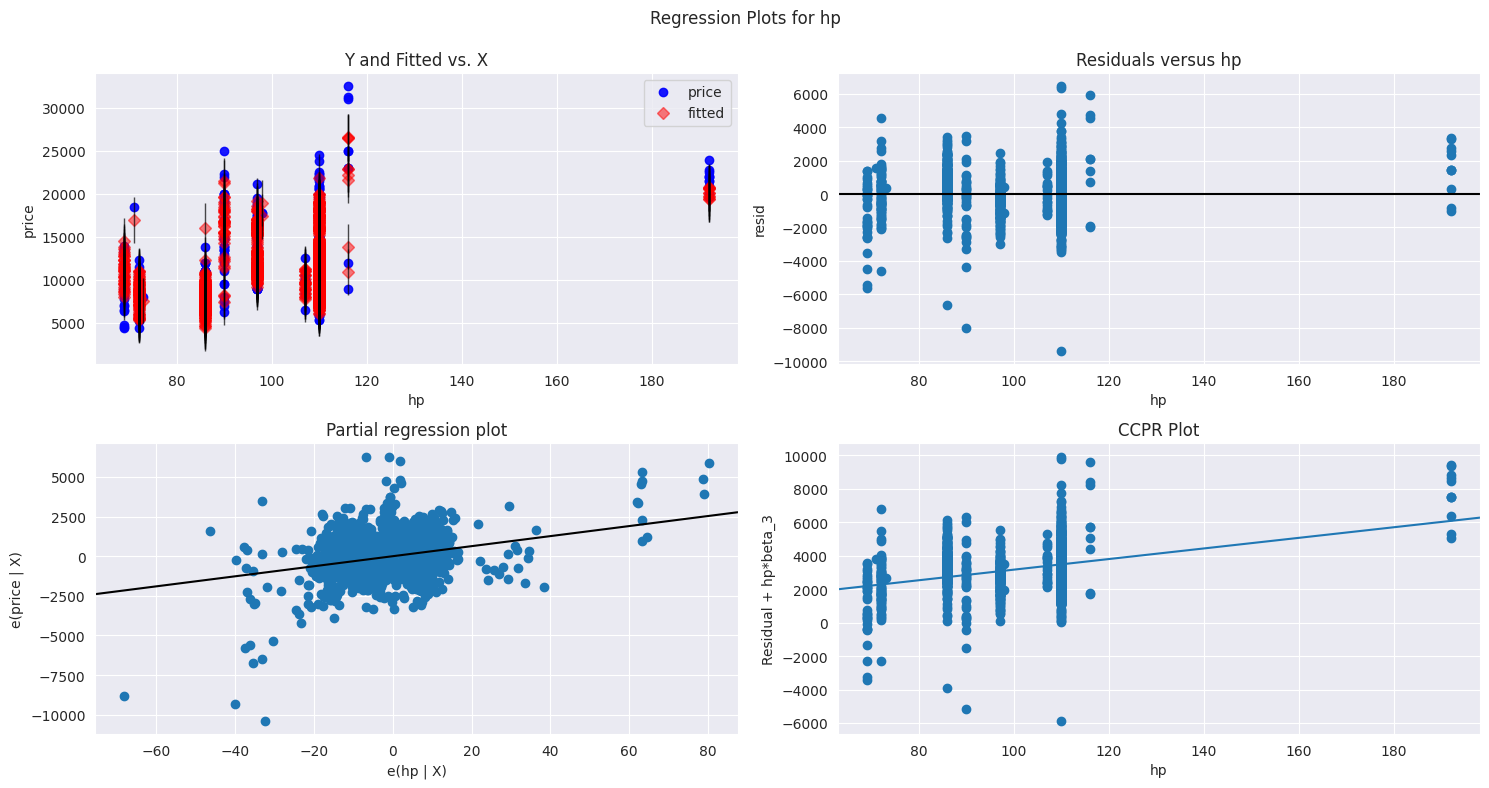

In [148]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'hp',fig=fig)
plt.show()

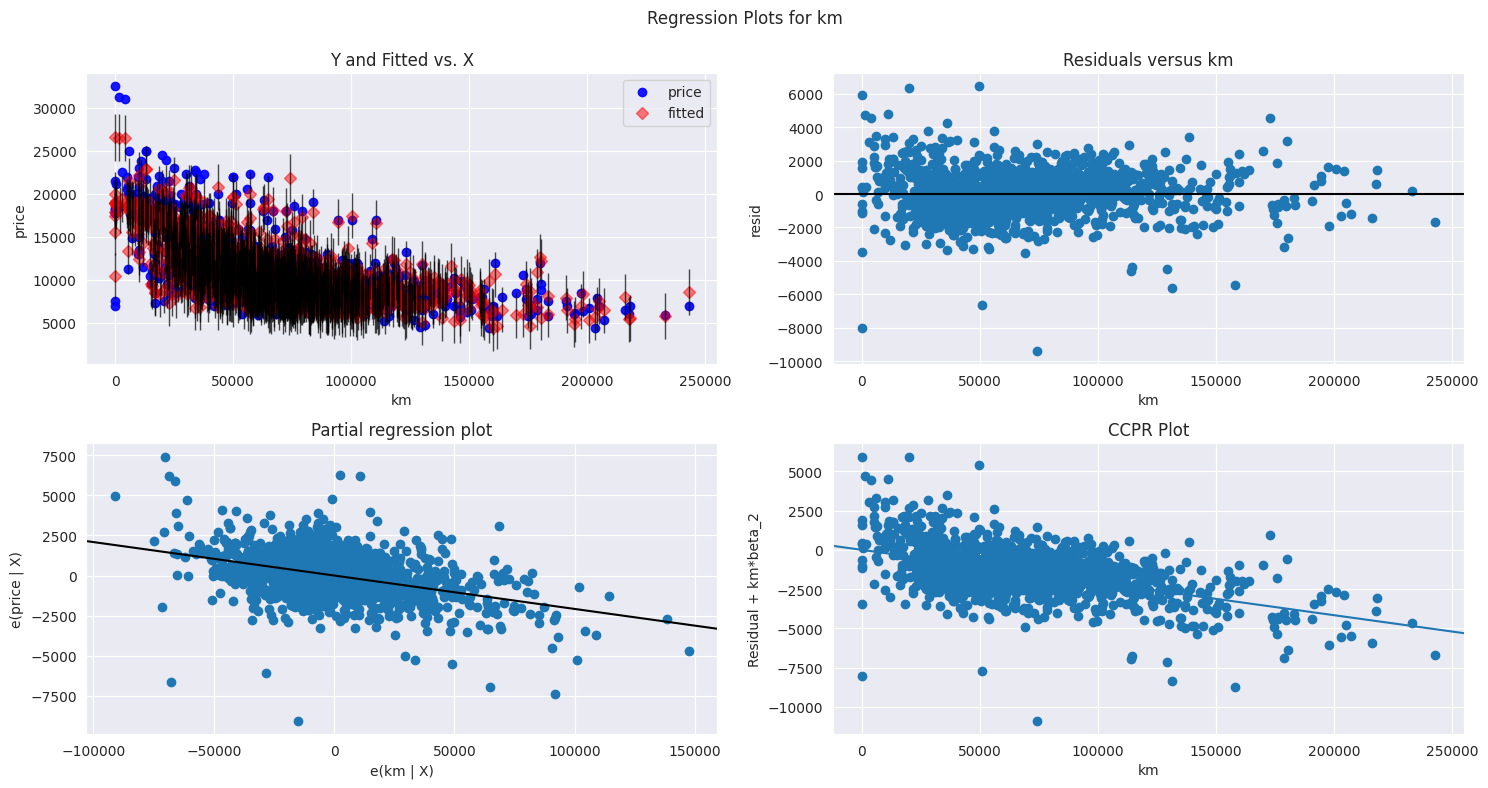

In [149]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'km',fig=fig)
plt.show()

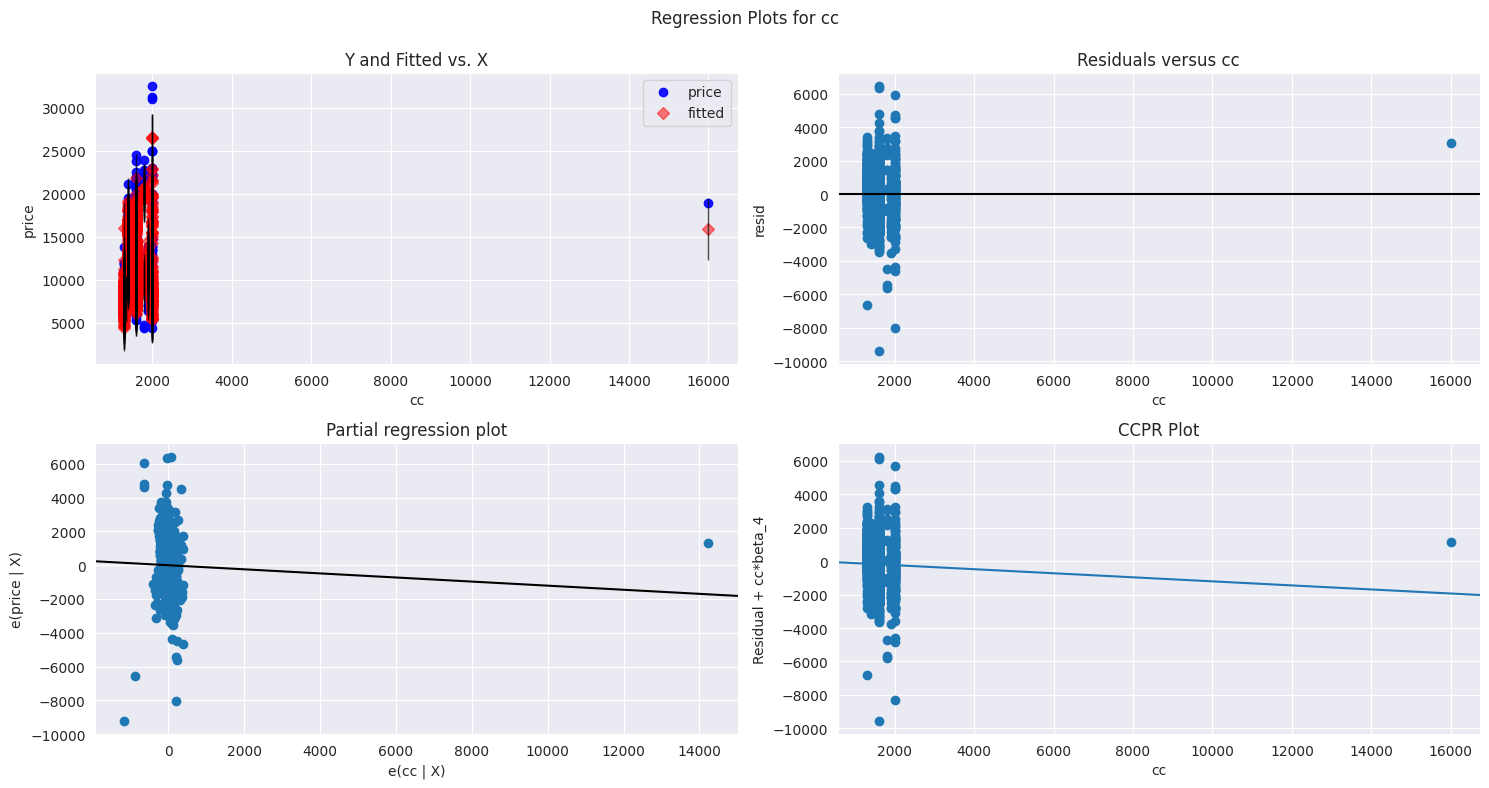

In [150]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'cc',fig=fig)
plt.show()

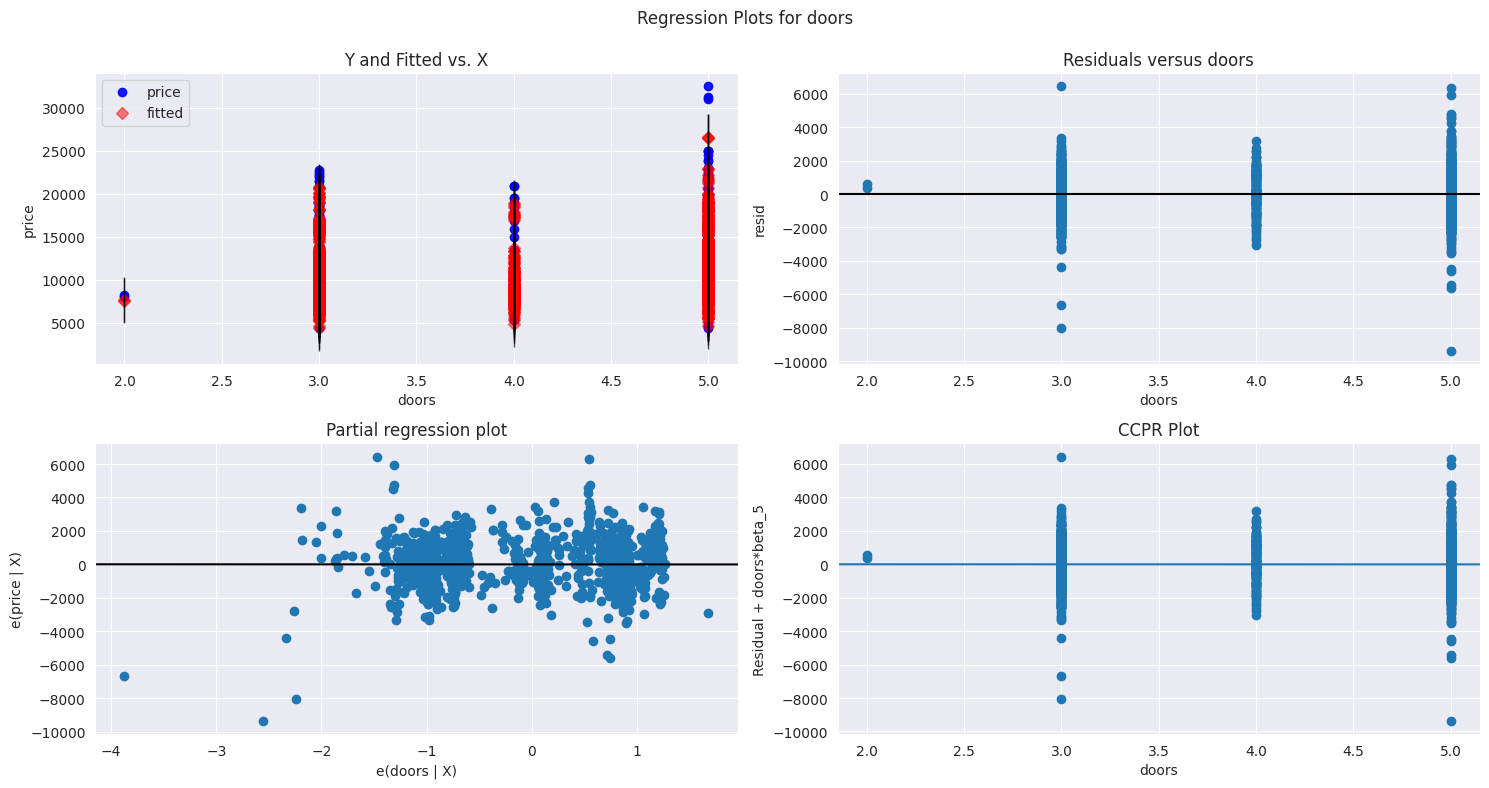

In [151]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'doors',fig=fig)
plt.show()

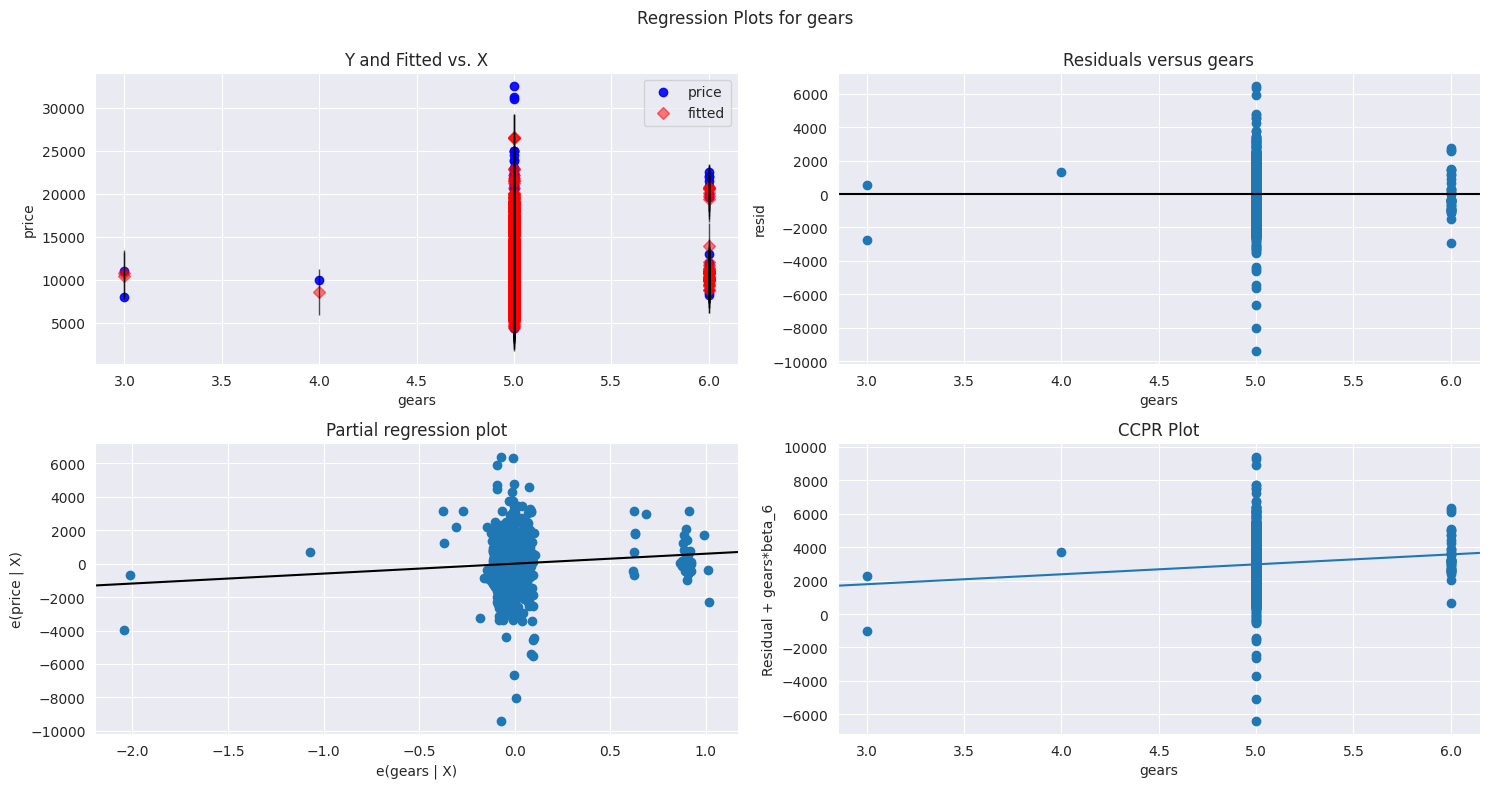

In [152]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'gears',fig=fig)
plt.show()

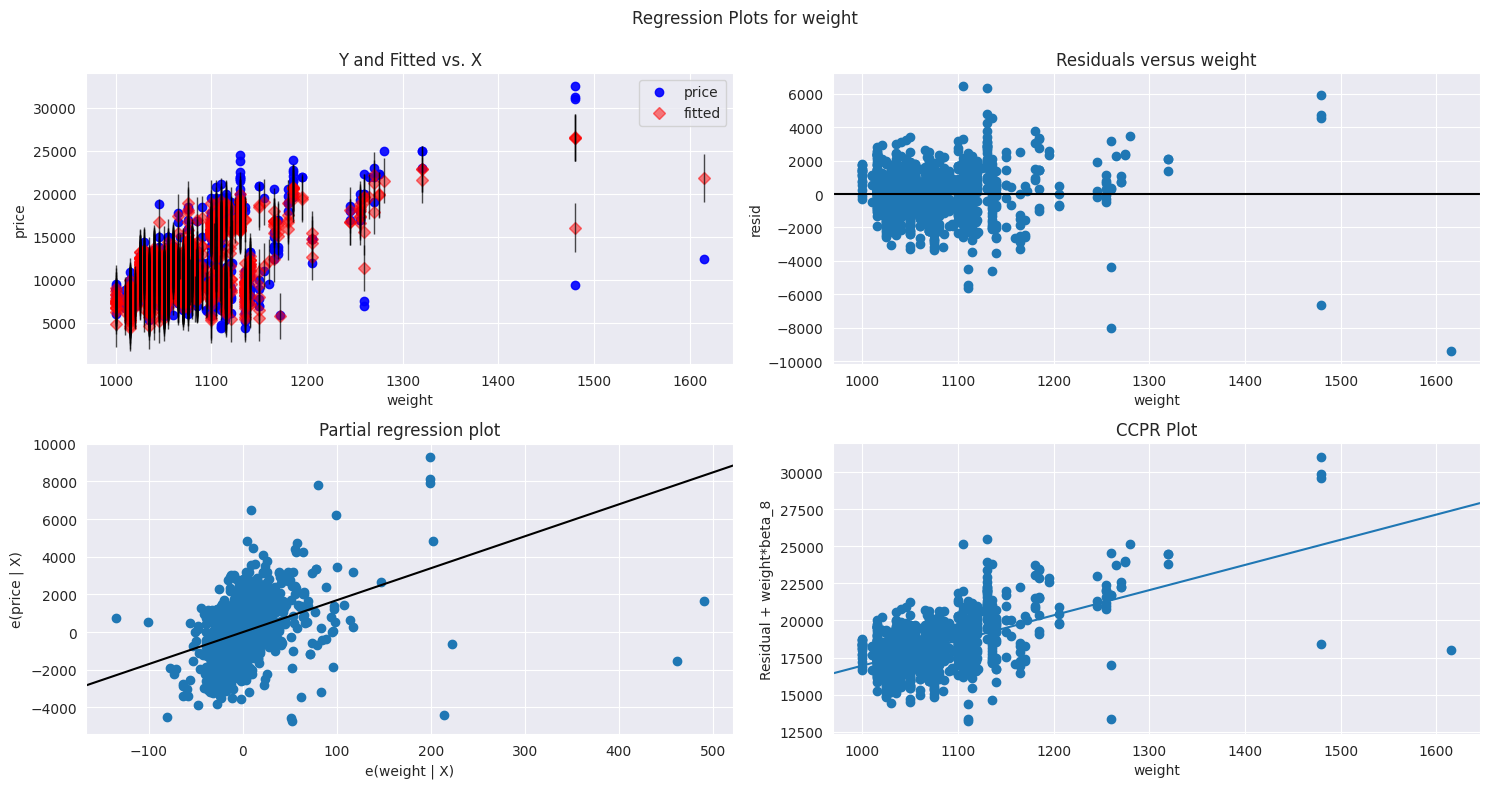

In [153]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'weight',fig=fig)
plt.show()

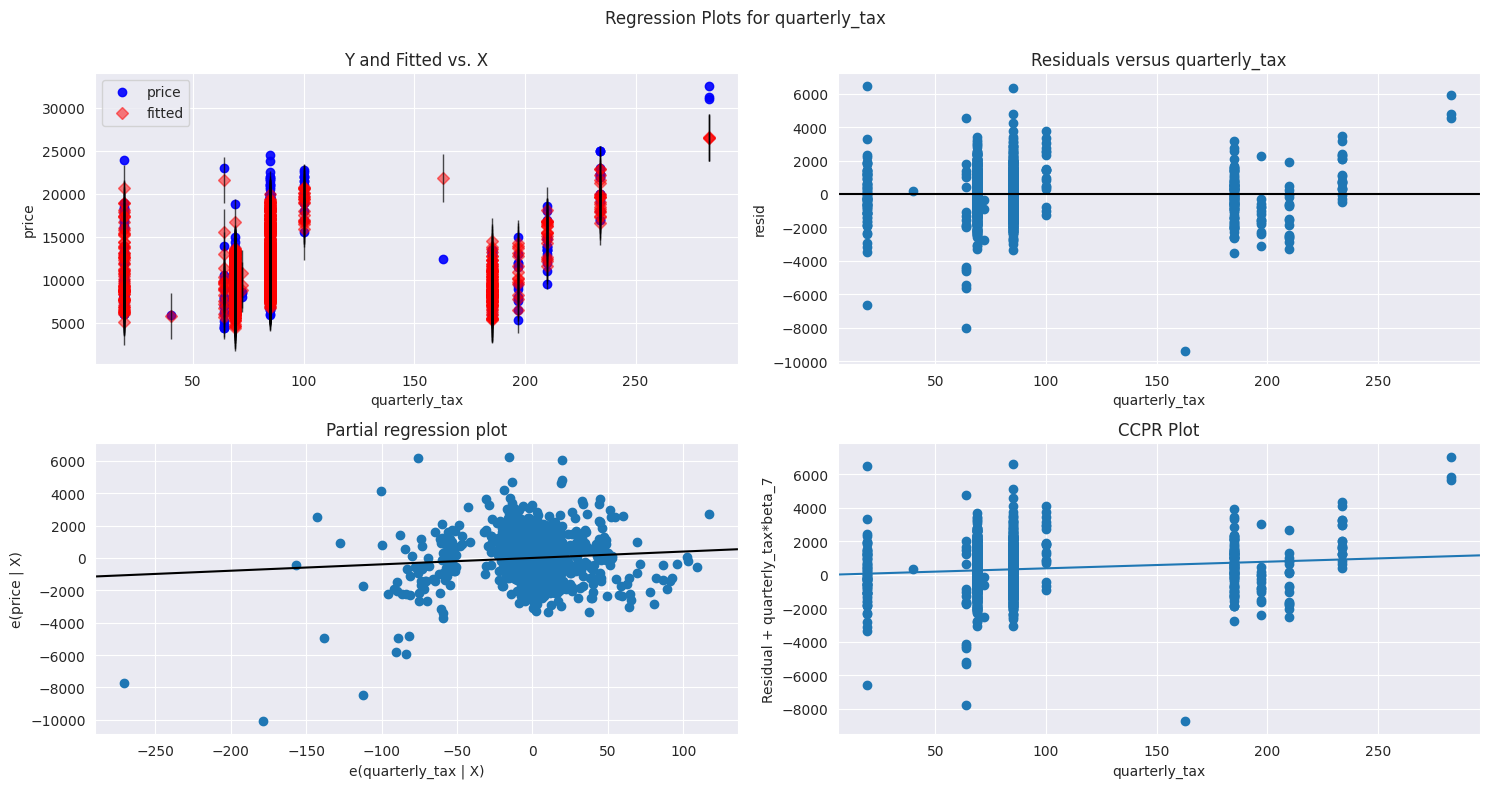

In [154]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'quarterly_tax',fig=fig)
plt.show()

**Model Diagnostics (checking Outliers or Influencers)**

**Two Techniques : Cook's Distance & Leverage value**



In [155]:
(c,_) = model.get_influence().cooks_distance
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

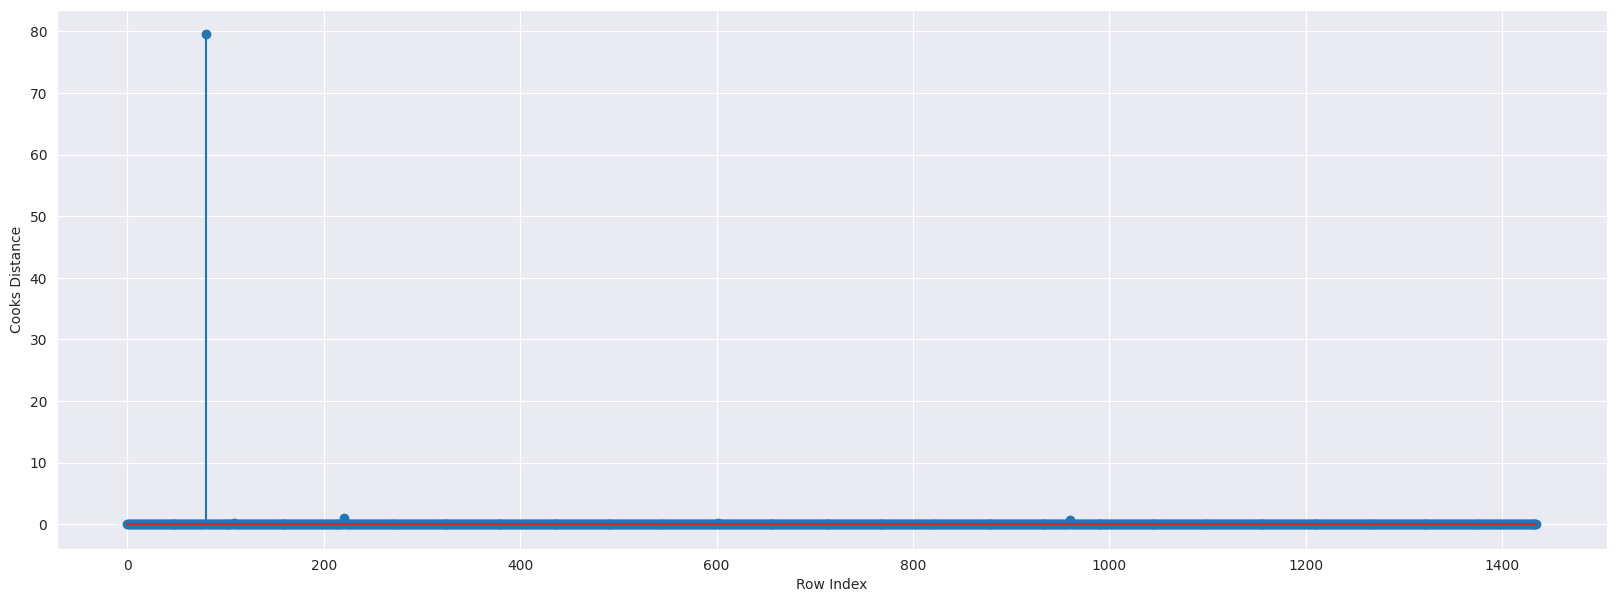

In [156]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [157]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 79.52010624141815)

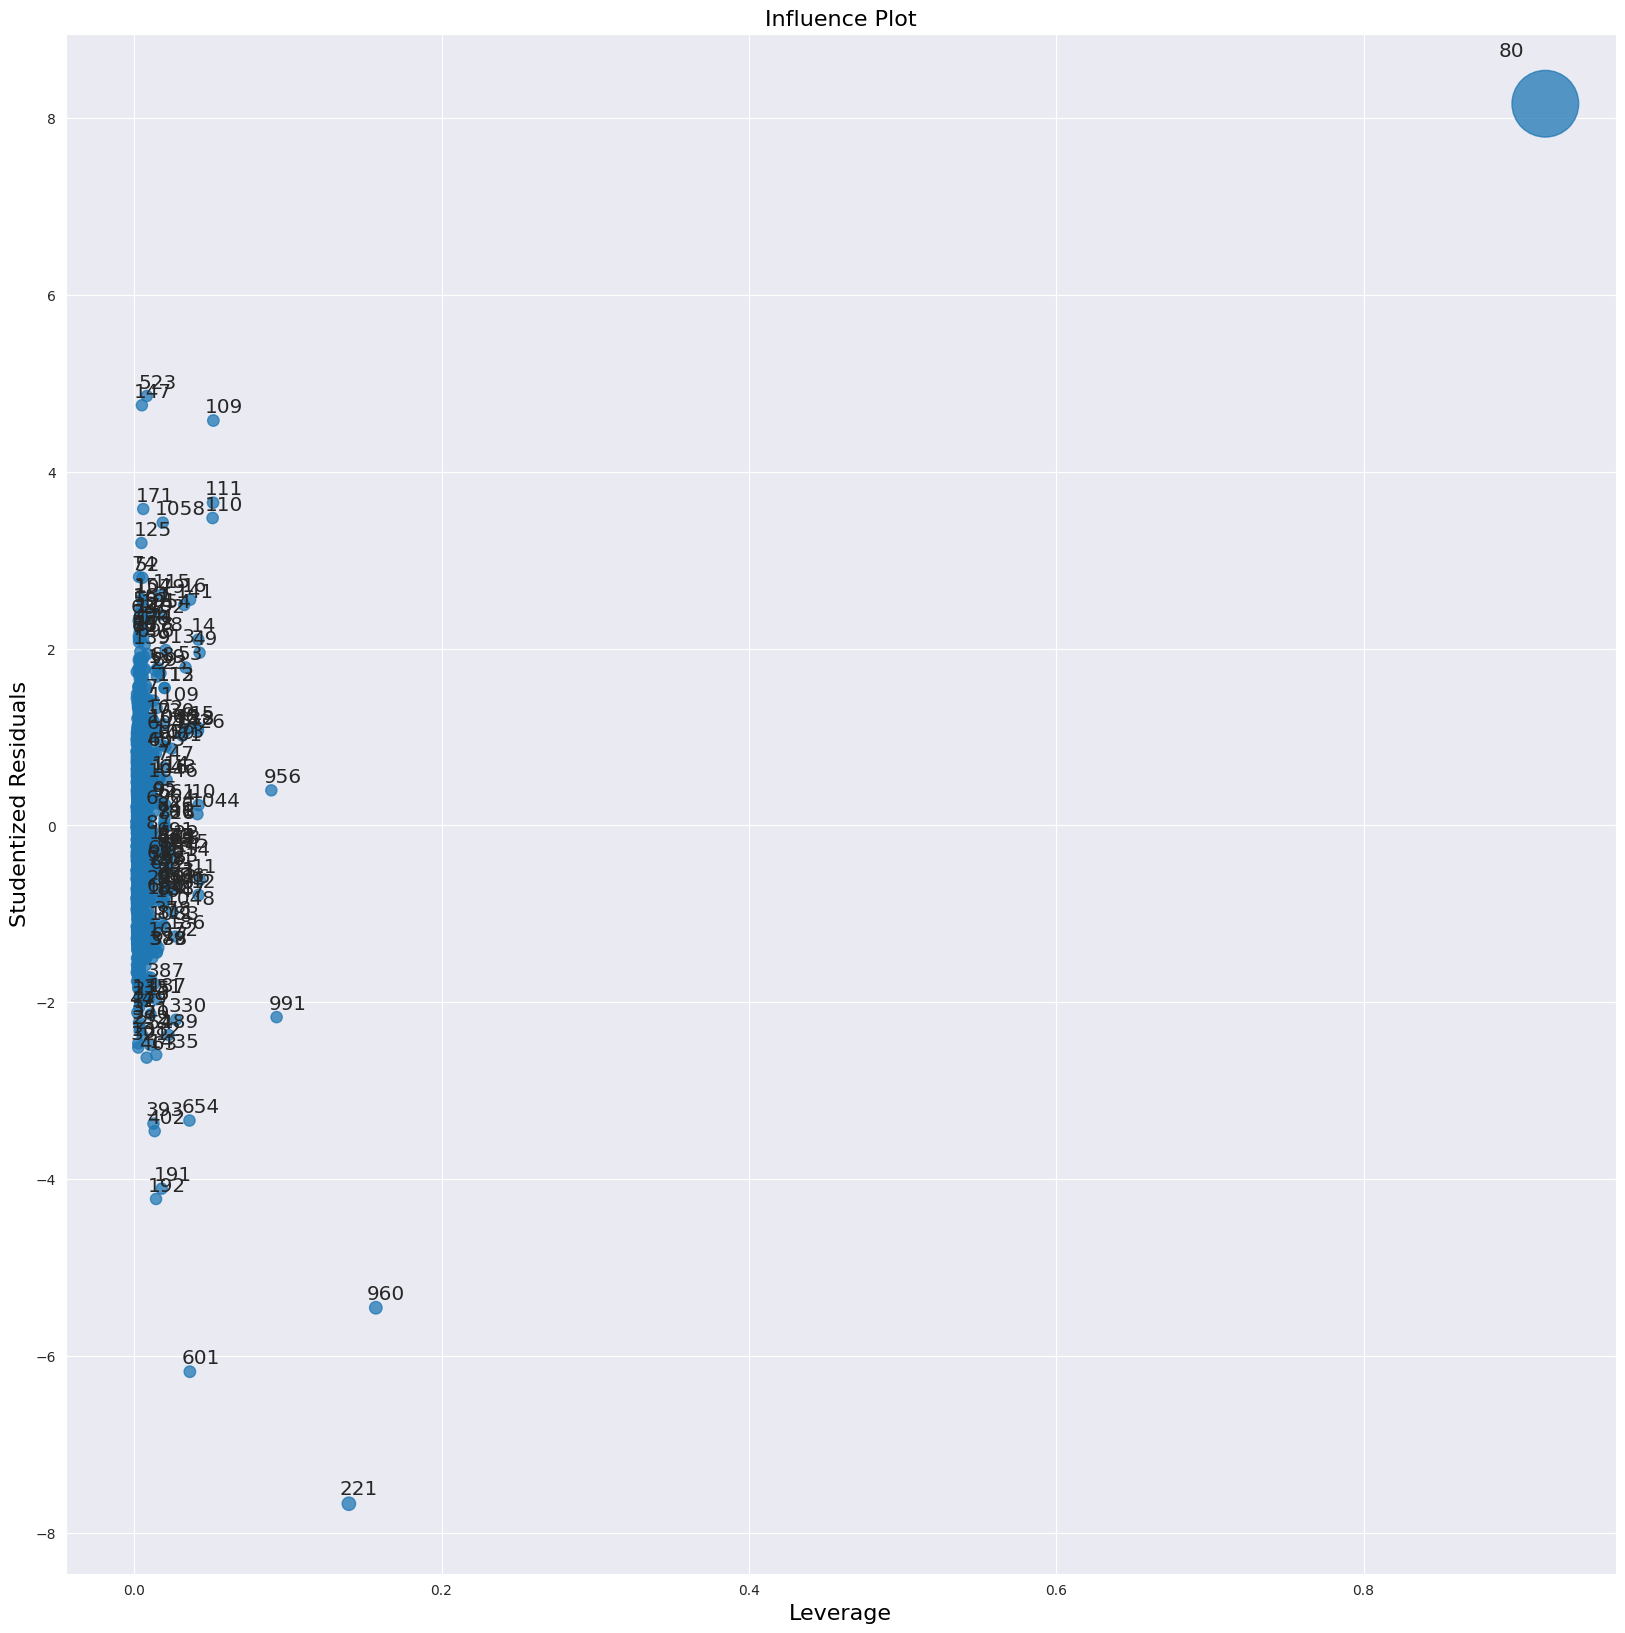

In [158]:
from statsmodels.graphics.regressionplots import influence_plot
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [159]:
 # Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=df.shape[1]
n=df.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020891364902506964

In [160]:
df[df.index.isin([80])]

,price,age_08_04,km,hp,cc,doors,gears,quarterly_tax,weight
80,18950,25,20019,110,16000,5,5,100,1180


**Improving the Model**

In [161]:
# Discard the data points which are influencers and reassign the row number
df1=df.drop(df.index[[80]],axis=0).reset_index(drop=True)
df1

,price,age_08_04,km,hp,cc,doors,gears,quarterly_tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


**Model Diagnostics and Final Model**

In [162]:
model=smf.ols('price~age_08_04+km+hp+cc+doors+gears+quarterly_tax+weight',data=df1).fit()

In [163]:
model.rsquared

0.8693790488655819

In [164]:
model_inf = model.get_influence()
(c_V, _) = model_inf.cooks_distance
np.argmax(c) , np.max(c)

(80, 79.52010624141815)

In [165]:
 df1=df1.drop(df1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
 df1

,price,age_08_04,km,hp,cc,doors,gears,quarterly_tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [166]:
model=smf.ols('price~age_08_04+km+hp+cc+doors+gears+quarterly_tax+weight',data=df1).fit()
model.rsquared

0.8691811902771708

**Model Predictions**

In [167]:
#New data for prediction is
df_new=pd.DataFrame({"age_08_04":32,"km":38500, "hp":78,"cc":1500,"doors":3,"gears":5,"quarterly_tax":200,"weight":1200 },index=[1])
model.predict(df_new)

1    17000.827211
dtype: float64

In [168]:
# Manual Predicttion of price
model.predict(df_new)

1    17000.827211
dtype: float64

In [169]:
# Automatic Prediction of Price
pred_y=model.predict(df1)
pred_y

0       16527.042781
1       16064.415894
2       16500.670310
3       16147.737547
4       15936.267459
            ...     
1429     8971.069765
1430     8435.741269
1431     8591.519488
1432     8713.711755
1433     9966.473072
Length: 1434, dtype: float64